# Learning objectives:
After doing this exercise, you'll know how to do the following:

Tune the following hyperparameters:
1. learning rate
2. number of epochs
3. batch size

Interpret different kinds of loss curves.

In [2]:
# importing relevant libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

2021-10-05 20:28:21.537023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 20:28:21.537199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Define functions that build and train a model
The following code defines two functions:

1. build_model(my_learning_rate), which builds an empty model.
2. train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell. You may optionally double-click the headline to explore this code.

In [3]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model 
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                    loss="mean_squared_error",
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data"""

    # Feed teh feature values and the label values to the model. 
    # The model will train for the specified number
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history = model.fit(x=feature, y=label, 
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch

    # Gather the istory (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean
    # squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


# Define plotting functions
We're using a popular Python library called Matplotlib to create the following two plots:
1. a plot of the feature values vs. the label values, and a line showing the output of the trained model.
2. a loss curve.

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [4]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the trainng feature and label."""
    
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coodinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c = 'r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min() * 0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss+curce functions.")

Defined the plot_the_model and plot_the_loss+curce functions.


# Define the dataset
The dataset consists of 12 examples. Each example consists of one feature and one label.

In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Specify the hyperparameters
The hyperparameters in this Colab are as follows:
1. learning rate
2. epochs
3. batch_size

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

2021-10-05 20:28:34.426098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-05 20:28:34.426316: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-05 20:28:34.426420: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HVG): /proc/driver/nvidia/version does not exist
2021-10-05 20:28:34.427539: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-05 20:28:34.859743: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimizati

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 927.1476 - root_mean_squared_error: 30.4491
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 911.3279 - root_mean_squared_error: 30.1882
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 899.9827 - root_mean_squared_error: 29.9997
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 890.5612 - root_mean_squared_error: 29.8423
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 882.2547 - root_mean_squared_error: 29.7028
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 874.6884 - root_mean_squared_error: 29.5751
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 867.6536 - root_mean_squared_error: 29.4560
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 861.0205 - root_mean_squared_error: 29.3432
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 854.7025 - root_

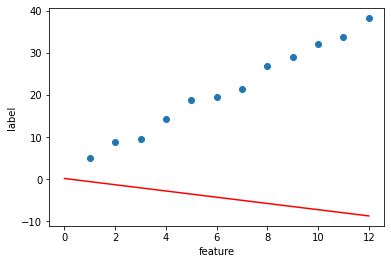

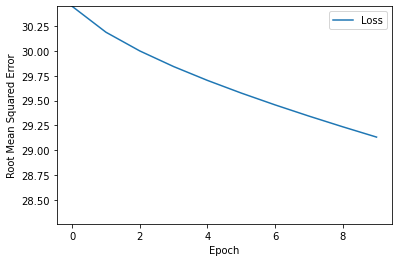

In [6]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 1: Examine the graphs
Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

# Task 2: Increase the number of epochs
Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/450
1/1 [==============================] - 0s 8ms/step - loss: 842.7825 - root_mean_squared_error: 29.0307
Epoch 2/450
1/1 [==============================] - 0s 9ms/step - loss: 837.1017 - root_mean_squared_error: 28.9327
Epoch 3/450
1/1 [==============================] - 0s 11ms/step - loss: 831.5692 - root_mean_squared_error: 28.8369
Epoch 4/450
1/1 [==============================] - 0s 10ms/step - loss: 826.1639 - root_mean_squared_error: 28.7431
Epoch 5/450
1/1 [==============================] - 0s 10ms/step - loss: 820.8690 - root_mean_squared_error: 28.6508
Epoch 6/450
1/1 [==============================] - 0s 9ms/step - loss: 815.6706 - root_mean_squared_error: 28.5599
Epoch 7/450
1/1 [==============================] - 0s 11ms/step - loss: 810.5574 - root_mean_squared_error: 28.4703
Epoch 8/450
1/1 [==============================] - 0s 13ms/step - loss: 805.5198 - root_mean_squared_error: 28.3817
Epoch 9/450
1/1 [==============================] - 0s 10ms/step - loss: 800

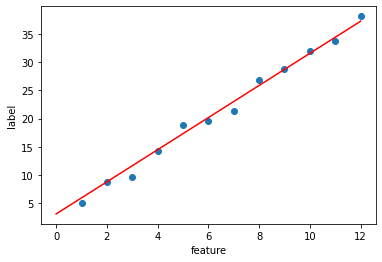

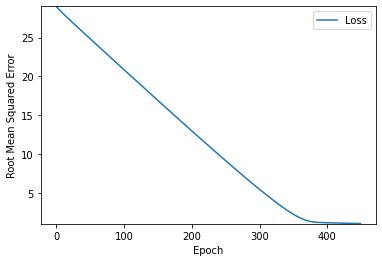

In [7]:
learning_rate = 0.01
epochs = 450
my_batch_size = 12

my_mdel = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                            my_feature,
                                                            my_label, 
                                                            epochs,
                                                            my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 3: Increase the learning rate
In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 1s 678ms/step - loss: 411.2595 - root_mean_squared_error: 20.2795
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 6711296.5000 - root_mean_squared_error: 2590.6169
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 408.3545 - root_mean_squared_error: 20.2078
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 2.4707 - root_mean_squared_error: 1.5718
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 0.9124 - root_mean_squared_error: 0.9552
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 0.8896 - root_mean_squared_error: 0.9432
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8881 - root_mean_squared_error: 0.9424
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8871 - root_mean_squared_error: 0.9419
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8863 -

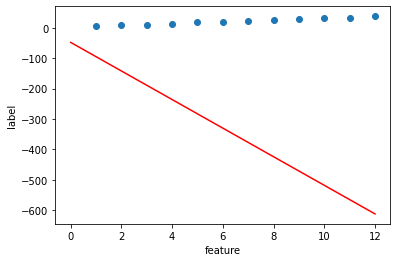

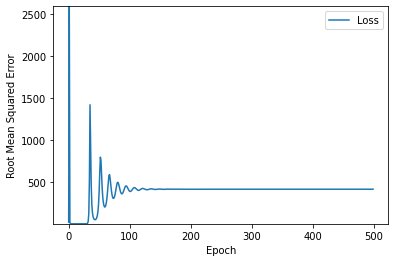

In [8]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a roller coaster. An oscillating loss curve strongly suggests that the learning rate is too high.

# Task 4: Find the ideal combination of epochs and learning rate
Assign values to the following two hyperparameters to make training converge as efficiently as possible:
1. learning_rate
2. epochs

Epoch 1/300
1/1 [==============================] - 1s 645ms/step - loss: 1159.5663 - root_mean_squared_error: 34.0524
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 687.8696 - root_mean_squared_error: 26.2273
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 453.6662 - root_mean_squared_error: 21.2994
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 309.4543 - root_mean_squared_error: 17.5913
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 213.5389 - root_mean_squared_error: 14.6130
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 147.5213 - root_mean_squared_error: 12.1458
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 101.4218 - root_mean_squared_error: 10.0708
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 69.1339 - root_mean_squared_error: 8.3147
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 4

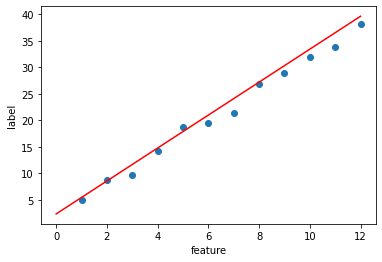

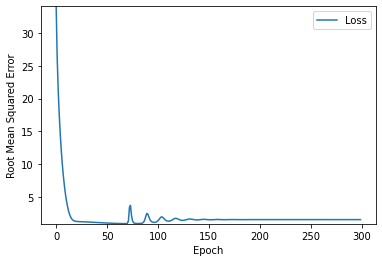

In [9]:
# Set the learning rate and number of epochs
learning_rate= 0.3  
epochs= 300   

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 5: Adjust the batch size
The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs?

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 886.2961 - root_mean_squared_error: 29.7707
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 636.5742 - root_mean_squared_error: 25.2304
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 463.0281 - root_mean_squared_error: 21.5181
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 331.4005 - root_mean_squared_error: 18.2044
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 220.1355 - root_mean_squared_error: 14.8370
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 137.7455 - root_mean_squared_error: 11.7365
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 79.7073 - root_mean_squared_error: 8.9279
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 39.2234 - root_mean_squared_error: 6.2629
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - l

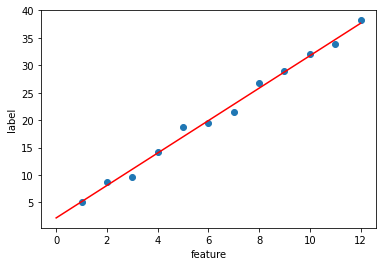

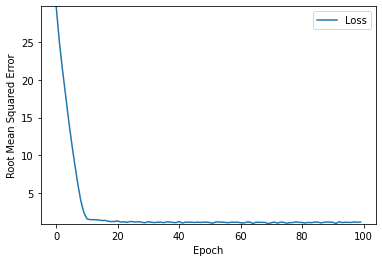

In [11]:
learning_rate=0.05
epochs=100
my_batch_size= 1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Summary of hyperparameter tuning
Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.

If the training loss does not converge, train for more epochs.

If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.

If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.

Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.

Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.

For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.